In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Veri setini yükle
data = pd.read_csv("/Users/mustafacitak/Desktop/Python/ML/ML_Calisma/Invistico_Airline.csv")

# Eksik değerleri doldur
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median())

# Kategorik ve sayısal sütunları bul
obj_col = data.select_dtypes(include='object').columns
num_col = data.select_dtypes(exclude='object').columns

# Kategorik sütunları etiket kodla
le = LabelEncoder()
for col in obj_col:
    data[col] = le.fit_transform(data[col])

# Sayısal sütunları normalize et
norm = Normalizer()
data[num_col] = norm.fit_transform(data[num_col])

# Veriyi eğitim ve test setlerine ayır
X_data = data.drop(['satisfaction'], axis=1)
y_data = data['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=42)

# Lojistik regresyon modelini oluştur ve eğit
log_reg = LogisticRegression()
fit_model = log_reg.fit(X_train, y_train)

# Tahminler yap
preds = fit_model.predict(X_test)
probs = fit_model.predict_proba(X_test)

# Sonuçları bir veri çerçevesine dönüştür
model_results = pd.DataFrame({
    'PredictedClass': preds,
    'TrueClass': y_test,
    'ClassProb:0': probs[:, 0],
    'ClassProb:1': probs[:, 1]
})

# Doğru sınıflandırma sayısını hesapla
true_count = sum(preds == y_test)
print("Number of True Classifications =", true_count)
print("Accurate Classification Ratio =", true_count / len(y_test))



Number of True Classifications = 32335
Accurate Classification Ratio = 0.7544154359440983


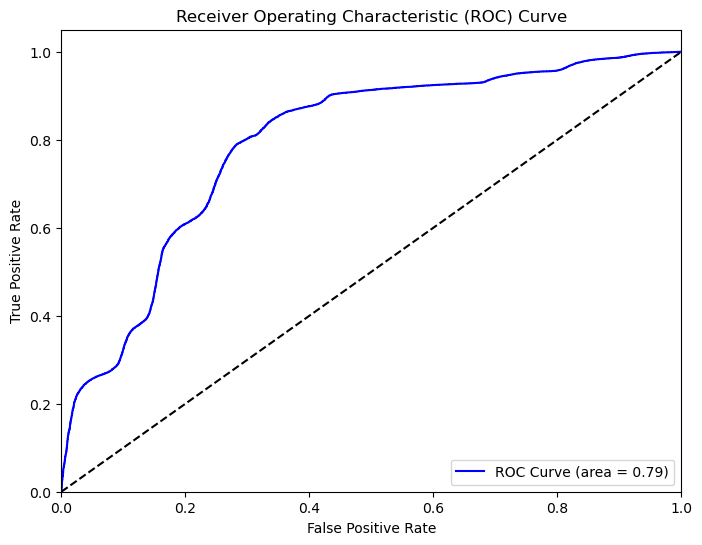

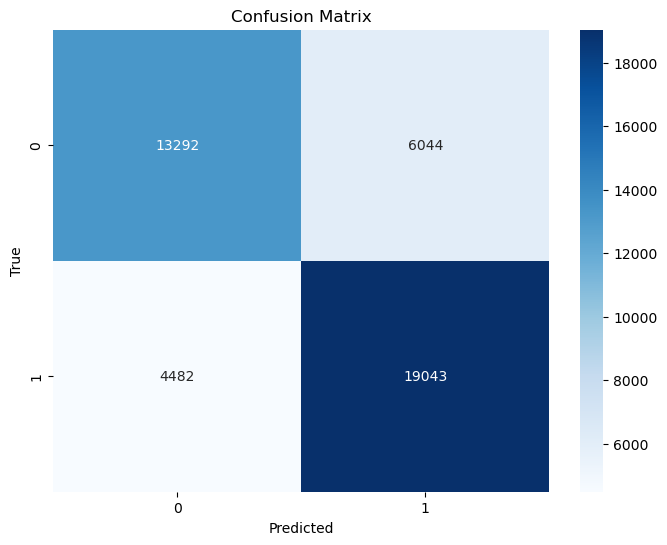

In [7]:
# ROC Eğrisi ve AUC Skoru
fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
roc_auc = roc_auc_score(y_test, probs[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc, color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Karmaşıklık Matrisi
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, Normalizer

# Veri setini yükle
data = pd.read_csv("/Users/mustafacitak/Desktop/Python/ML/ML_Calisma/Invistico_Airline.csv")

# Eksik değerleri doldur
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median())

# Kategorik ve sayısal sütunları bul
obj_col = data.select_dtypes(include='object').columns
num_col = data.select_dtypes(exclude='object').columns

# Kategorik sütunları etiket kodla
le = LabelEncoder()
for col in obj_col:
    data[col] = le.fit_transform(data[col])

# Sayısal sütunları normalize et
norm = Normalizer()
data[num_col] = norm.fit_transform(data[num_col])

# Veriyi eğitim ve test setlerine ayır
X_data = data.drop(['satisfaction'], axis=1)
y_data = data['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=42)

# Lojistik regresyon modelini oluştur ve eğit
log_reg = LogisticRegression()
fit_model = log_reg.fit(X_train, y_train)

# Yeni müşteri senaryosu
new_customer = pd.DataFrame({
    'Gender': [0],  # Örneğin, erkek (0) veya kadın (1) olarak belirtilebilir
    'Customer Type': [1],  # Örneğin, "loyal customer" (1) veya "disloyal customer" (0) olarak belirtilebilir
    'Age': [35],
    'Type of Travel': [1],  # Örneğin, iş (1) veya tatil (0) olarak belirtilebilir
    'Class': [0],  # Örneğin, ekonomi (0) veya iş (1) olarak belirtilebilir
    'Flight Distance': [800],
    'Seat comfort': [5],
    'Departure/Arrival time convenient': [4],
    'Food and drink': [4],
    'Gate location': [3],
    'Inflight wifi service': [3],
    'Inflight entertainment': [4],
    'Online support': [5],
    'Ease of Online booking': [5],
    'On-board service': [5],
    'Leg room service': [4],
    'Baggage handling': [4],
    'Checkin service': [4],
    'Cleanliness': [5],
    'Online boarding': [1],
    'Departure Delay in Minutes': [0],
    'Arrival Delay in Minutes': [10]
})

# Tahmin yap
predicted_class = fit_model.predict(new_customer)
print("Tahmin edilen sınıf:", predicted_class)


Tahmin edilen sınıf: [0]


In [12]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, Normalizer

# Veri setini yükle
data = pd.read_csv("/Users/mustafacitak/Desktop/Python/ML/ML_Calisma/Invistico_Airline.csv")

# Eksik değerleri doldur
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median())

# Kategorik ve sayısal sütunları bul
obj_col = data.select_dtypes(include='object').columns
num_col = data.select_dtypes(exclude='object').columns

# Kategorik sütunları etiket kodla
le = LabelEncoder()
for col in obj_col:
    data[col] = le.fit_transform(data[col])

# Sayısal sütunları normalize et
norm = Normalizer()
data[num_col] = norm.fit_transform(data[num_col])

# Veriyi eğitim ve test setlerine ayır
X_data = data.drop(['satisfaction'], axis=1)
y_data = data['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=42)

# Lojistik regresyon modelini oluştur ve eğit
log_reg = LogisticRegression()
fit_model = log_reg.fit(X_train, y_train)

# Yeni bir müşteri verisi oluştur
new_customer = pd.DataFrame({
    'Gender': [1],  # Kadın (1) olarak belirtildi
    'Customer Type': [1],  # Örneğin, "loyal customer" (1) olarak belirtilebilir
    'Age': [30],  # Örneğin, müşterinin yaşı
    'Type of Travel': [0],  # Örneğin, "Personal Travel" (0) olarak belirtilebilir
    'Class': [1],  # Örneğin, "Business" (1) olarak belirtilebilir
    'Flight Distance': [500],  # Uçuş mesafesi
    'Seat comfort': [5],  # Koltuk konforu puanı
    'Departure/Arrival time convenient': [4],  # Kalkış / Varış zamanı uygunluğu puanı
    'Food and drink': [5],  # Yiyecek ve içecek puanı
    'Gate location': [3],  # Kapı konumu puanı
    'Inflight wifi service': [4],  # Uçak içi wifi hizmeti puanı
    'Inflight entertainment': [5],  # Uçak içi eğlence puanı
    'Online support': [4],  # Çevrimiçi destek puanı
    'Ease of Online booking': [5],  # Çevrimiçi rezervasyon kolaylığı puanı
    'On-board service': [5],  # Uçak içi hizmet puanı
    'Leg room service': [5],  # Bacak mesafesi hizmeti puanı
    'Baggage handling': [5],  # Bagaj işleme puanı
    'Checkin service': [5],  # Check-in hizmeti puanı
    'Cleanliness': [5],  # Temizlik puanı
    'Online boarding': [5],  # Çevrimiçi tahta puanı
    'Departure Delay in Minutes': [10],  # Kalkış gecikmesi (dakika cinsinden)
    'Arrival Delay in Minutes': [5]  # Varış gecikmesi (dakika cinsinden)
})

# Tahmin yap
predicted_class = fit_model.predict(new_customer)
print("Tahmin edilen sınıf:", predicted_class)


Tahmin edilen sınıf: [0]
